<a href="https://colab.research.google.com/github/Laiba-saeed92/Machine_learning_projects/blob/main/ML_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
#r2_score, MSE,MAE are used for regression models to check performance by knowing the error
#confusion matrix,Classification report for classification models to check the model performance

**Importing dataset**

In [2]:
car_dataset=pd.read_csv('cardata.csv')

In [3]:
car_dataset.head() #inspecting the first 5 rows of the dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape #checking the no of rows and columns in the dataset

(301, 9)

**Getting info about the dataset**

In [5]:
#info() will tell us the null or missing values and datatype i.e if theres any string datatype r int r float
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [30]:
car_dataset.describe() #describes the mean,std,count etc of only int/float i.e numeric data only not string

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
#To check any number of null r missing value in any column
car_dataset.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [5]:
#print(car_dataset.Car_Name.value_counts()) this feature has no effect on output
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**Encoding categorical data**


In [6]:
#encoding 'Fuel_type' column
# Replace and convert to integer
car_dataset['Transmission'] = car_dataset['Transmission'].replace({'Manual': 0, 'Automatic': 1}).astype(int)
car_dataset['Fuel_Type'] = car_dataset['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG':2}).astype(int)
car_dataset['Seller_Type'] = car_dataset['Seller_Type'].replace({'Dealer': 0, 'Individual': 1}).astype(int)
print(car_dataset)



    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1              0   

<ipython-input-6-ee1309f1ff35>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset['Transmission'] = car_dataset['Transmission'].replace({'Manual': 0, 'Automatic': 1}).astype(int)
<ipython-input-6-ee1309f1ff35>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset['Fuel_Type'] = car_dataset['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG':2}).astype(int)
<ipython-input-6-ee1309f1ff35>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

In [4]:
'''#Another way to encode categorize data is one hot encoding
import pandas as pd
data = {
    'Fuel_type': ['Petrol', 'Diesel', 'CNG'],
    'Transmission': ['Manual', 'Automatic', 'Manual']
}
car = pd.DataFrame(data)
car_dataset=pd.get_dummies(car, drop_first=True, dtype=int)
print(car_dataset)'''

   Fuel_type_Diesel  Fuel_type_Petrol  Transmission_Manual
0                 0                 1                    1
1                 1                 0                    0
2                 0                 0                    1


In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Splitting the features(X) target(y)**

In [7]:
X=car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y=car_dataset['Selling_Price']

In [17]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


**Splitting training and testing data**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

**Feature scaling**

In [9]:
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data (no fitting to avoid data leakage)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data:\n", X_train_scaled)
print("\nScaled Testing Data:\n", X_test_scaled)

Scaled Training Data:
 [[-1.99046855 -0.76923237 -0.83904661 ...  1.35566878  2.85139173
  -0.18730358]
 [-0.24444351  1.26268234  0.43381798 ... -0.73764331 -0.35070593
  -0.18730358]
 [ 0.80317152  0.38139709  0.12793616 ... -0.73764331 -0.35070593
  -0.18730358]
 ...
 [ 0.1047615  -0.44579392 -0.49554421 ...  1.35566878 -0.35070593
   3.38849211]
 [-0.94285352  0.292367    0.74767564 ... -0.73764331 -0.35070593
  -0.18730358]
 [ 1.15237653 -0.63399678 -0.78963873 ...  1.35566878 -0.35070593
  -0.18730358]]

Scaled Testing Data:
 [[ 0.80317152 -0.77035933 -0.31908751 -0.48756643  1.35566878  2.85139173
  -0.18730358]
 [ 0.80317152  0.69807376 -0.62541635 -0.48756643 -0.73764331 -0.35070593
  -0.18730358]
 [-0.59364851  0.2247492   0.52790469  1.83945516 -0.73764331 -0.35070593
  -0.18730358]
 [-0.94285352 -0.77035933 -0.06028433 -0.48756643  1.35566878 -0.35070593
   3.38849211]
 [-0.24444351  1.26268234  0.057377   -0.48756643 -0.73764331 -0.35070593
  -0.18730358]
 [ 0.45396651  0.

**Model training using Linear Regression**

In [10]:
#Loading the linear regression model
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred=model.predict(X_train)

In [12]:
r_squared_train=r2_score(y_train_pred, y_train) ##r squared measures how well the model fits the data, a higher r2 indicates better model performance
print(r_squared_train)

0.858610252967407


**Visualizing the training data**

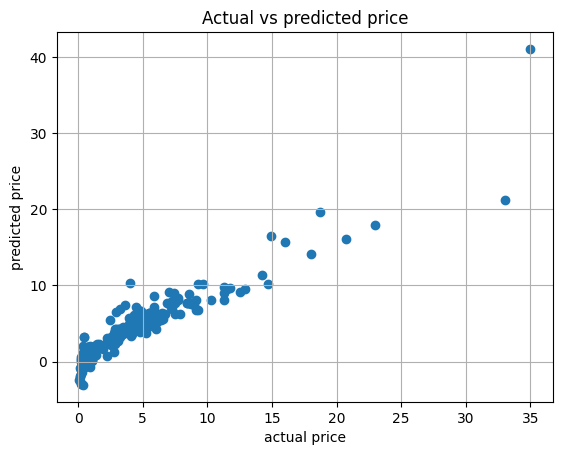

In [13]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual vs predicted price')
plt.grid('True')
plt.show()


In [14]:
y_test_pred=model.predict(X_test)

In [15]:
r_squared_test=r2_score(y_test_pred, y_test)
print(r_squared_test)

0.829493336977748


**Visualizing the testing data**

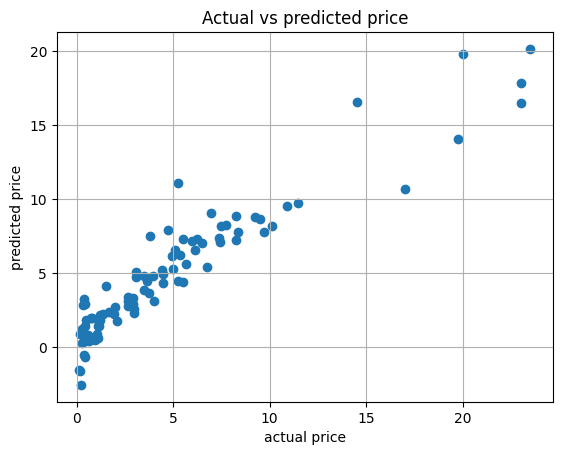

In [16]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual vs predicted price')
plt.grid('True')
plt.show()

### **Lasso Regression**

In [ ]:
'''To select only the most important features, making the model simpler and more interpretable.used for dataset having multiple features
 regression is a type of linear regression that adds a penalty for having too many features.
  On the other hand Linear regressionDraws the best-fitting straight line to predict values based on input features for datasets with less features.


**Model training using Linear Regression**

In [68]:
#Loading the linear regression model
model=Lasso(alpha=0.01)
model.fit(X_train, y_train)
#Lasso regression can reduce the coefficients of less important features to zero, effectively removing them from the model.
#If some of these features actually contribute to explaining the variance in the target variable, removing them can decrease the R-squared value.'''
#Lasso tends to select one feature from a group of correlated features, setting the rest to zero
#The penalty strength (alpha or lambda) controls how much the coefficients are shrunk.
#If the lambda value is too high, Lasso will aggressively shrink coefficients, even those that are useful for prediction.
#This can result in underfitting, where the model is too simple and R-squared drops
#so we need to Reduce alpha to lessen the penalty and retain more features.

Lasso(alpha=0.01)

In [61]:
y_train_pred=model.predict(X_train)

In [62]:
r_squared_train=r2_score(y_train_pred, y_train) ##r squared measures how well the model fits the data, a higher r2 indicates better model performance
print(r_squared_train)

0.8576871746722667


**Visualizing the training data**

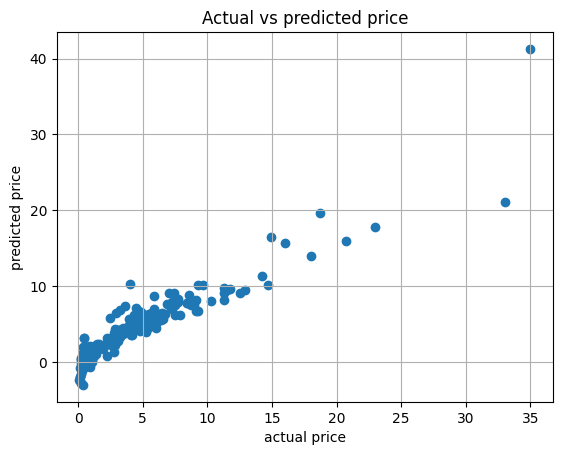

In [63]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual vs predicted price')
plt.grid('True')
plt.show()


In [64]:
y_test_pred=model.predict(X_test)

In [65]:
r_squared_test=r2_score(y_test_pred, y_test)
print(r_squared_test)

0.8272424241429974


**Visualizing the testing data**

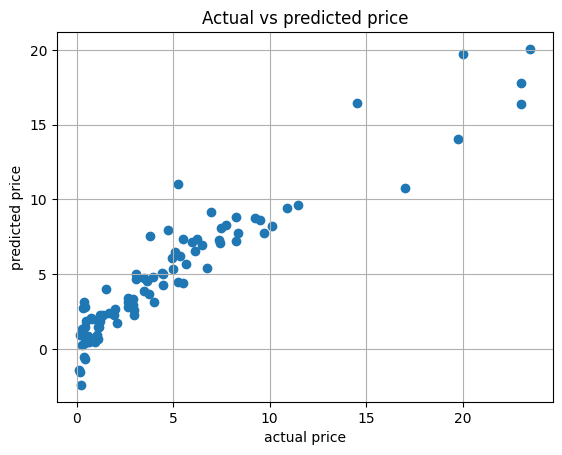

In [66]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual vs predicted price')
plt.grid('True')
plt.show()